In [82]:
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
feat_labels = data.columns[0:9]
X = data.iloc[:150,:9].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
forest = RandomForestClassifier(n_estimators=1000,random_state=0,n_jobs=-1)
forest.fit(X_train, y_train)
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]
for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30,feat_labels[f],importances[indices[f]]))

 1) height                         0.373176
 2) length                         0.234349
 3) area                           0.118459
 4) eccentricity                   0.108709
 5) p_black                        0.106381
 6) p_and                          0.023389
 7) mean_tr                        0.015284
 8) blackpix                       0.010800
 9) blackand                       0.009452


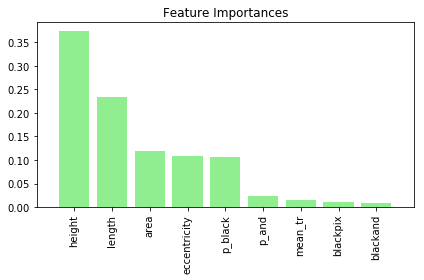

In [83]:
import matplotlib.pyplot as plt
plt.title('Feature Importances')
plt.bar(range(X_train.shape[1]),
importances[indices],
color='lightgreen',
align='center')
plt.xticks(range(X_train.shape[1]),
feat_labels, rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
plt.show()

In [84]:
from sklearn.cross_validation import train_test_split
data = pd.read_csv('pageblock.csv')
data = data.sort_values(by='class')
data=data.reset_index(drop=True)
X = data.iloc[0:150, [1,2]].values
y = data.iloc[0:150,10].values
y = np.where(y == 'graphic', -1, 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [85]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

C:\Users\Yashasvi\Anaconda3\lib\site-packages\sklearn\utils\validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)


In [86]:
from sklearn.linear_model import Perceptron
ppn = Perceptron(n_iter=40, eta0=0.1, random_state=0)
ppn.fit(X_train_std, y_train)

Perceptron(alpha=0.0001, class_weight=None, eta0=0.1, fit_intercept=True,
      n_iter=40, n_jobs=1, penalty=None, random_state=0, shuffle=True,
      verbose=0, warm_start=False)

In [87]:
from sklearn import tree
from sklearn.tree import export_graphviz
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.978


In [88]:
export_graphviz(tree,out_file='tree.odt',class_names=['graphic','non-graphic'],feature_names=['height','length'],impurity=False,filled=True)

In [89]:
import graphviz

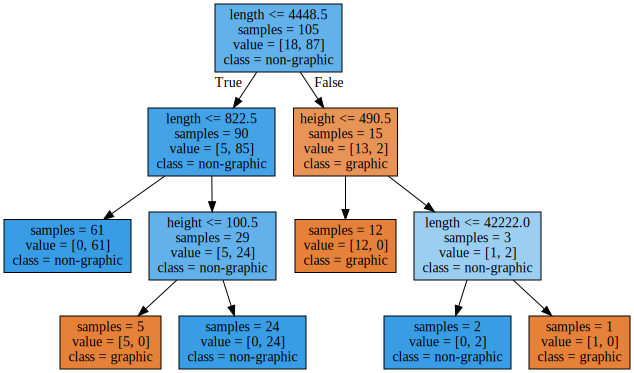

In [90]:
with open("tree.odt") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)